# (Homework) Week 6 - DataScience Bootcamp Fall 2025

All solution cells are replaced with `# TODO` placeholders so you can fill them in.
---

### Problem 1: Dataset Splitting

1. You have recordings of 44 phones from 100 people; each person records ~200 phones/day for 5 days.
   - Design a valid training/validation/test split strategy that ensures the model generalizes to **new speakers**.

2. You now receive an additional dataset of 10,000 phone recordings from **Kilian**, a single speaker.
   - You must train a model that performs well **specifically for Kilian**, while also maintaining generalization.

*Describe your proposed split strategy and reasoning.* (Theory)

1. split strategy：

Split by speaker:
  Training: 80 speakers
  Validation: 10 speakers
  Test: 10 speakers
  No overlap between sets and make sure each set has all 44 phone types

Reason:
  This prevents information leak.
  The model learns to recognize phones, not memorize speaker voices.
  Test results show if the model works for new, unseen speakers.

2. splict strategy:

Split Kilian’s data:
  Train: 7,000
  Validation: 1,000
  Test: 2,000

Train in two steps:
  Train general model on 80-speaker data.
  Fine-tune a small part of the model (or add a new head) on Kilian’s train set only.
  In this way, the model can remember Kilian's special pronunciation, timbre, and small habits (such as his accent, particularly soft voice, etc.).

Use validation sets separately:
  Use Kilian’s validation set to tune for Kilian.
  Use the original validation set to make sure overall performance is not hurt.

Reason:
  This keeps the model good for both new speakers and Kilian.
  It avoids overfitting to Kilian while still personalizing for him.


### Problem 2: K-Nearest Neighbors

1. **1-NN Classification:** Given dataset:

   Positive: (1,2), (1,4), (5,4)

   Negative: (3,1), (3,2)

   Plot the 1-NN decision boundary and classify new points visually.

2. **Feature Scaling:** Consider dataset:

   Positive: (100,2), (100,4), (500,4)

   Negative: (300,1), (300,2)

   What would the 1-NN classify point (500,1) as **before and after scaling** to [0,1] per feature?

3. **Handling Missing Values:** How can you modify K-NN to handle missing features in a test point?

4. **High-dimensional Data:** Why can K-NN still work well for images even with thousands of pixels?


1. The 1-NN decision boundary is formed by the perpendicular bisectors between all pairs of training points from different classes. The plane is divided into regions, each associated with the closest training point. Any new point is classified according to the label of its nearest training point. For example, a point near (1,2) is classified as Positive, while a point close to (3,2) is classified as Negative. The boundaries between regions are straight lines where the distance to two training points is equal.

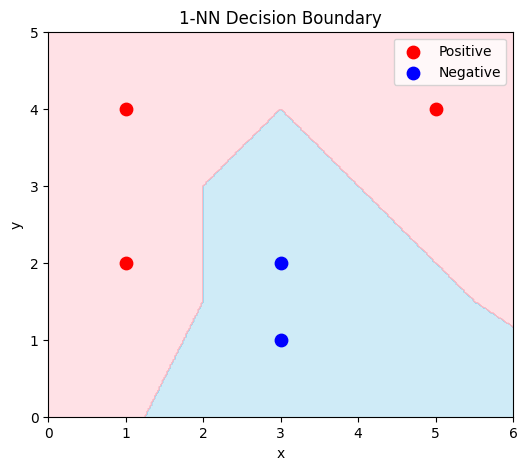

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

X = np.array([
    [1, 2], [1, 4], [5, 4], # Positive
    [3, 1], [3, 2]          # Negative
])
y = np.array([1, 1, 1, 0, 0])  # 1=Positive, 0=Negative

x_min, x_max = 0, 6
y_min, y_max = 0, 5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
X_grid = np.c_[xx.ravel(), yy.ravel()]

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
Z = knn.predict(X_grid)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6,5))
plt.contourf(xx, yy, Z, cmap=ListedColormap(['#87CEEB', '#FFB6C1']), alpha=0.4)
plt.scatter(X[y==1,0], X[y==1,1], c='r', label='Positive', s=80)
plt.scatter(X[y==0,0], X[y==0,1], c='b', label='Negative', s=80)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('1-NN Decision Boundary')
plt.show()


2. Before scaling, the point (500,1) is closest to (500,4), which is a Positive example, so it will be classified as Positive.
After scaling each feature to [0,1], the point (500,1) becomes (1,0). Its nearest neighbor is now (300,1), which is Negative, so it will be classified as Negative.

3. To handle missing features in a test point, K-NN can compute distances using only the available (non-missing) features. Missing features are ignored in the distance calculation, and the distance can be normalized by the number of valid features to ensure fairness.

4. Because images from the same class tend to have similar pixel values and thus are close in high-dimensional space.

### Problem 3: Part 1

You are given a fully trained Perceptron model with weight vector **w**, along with training set **D_TR** and test set **D_TE**.

1. Your co-worker suggests evaluating $h(x) = sign(w \cdot x)$ for every $(x, y)$ in D_TR and D_TE. Does this help determine whether test error is higher than training error?
2. Why is there no need to compute training error explicitly for the Perceptron algorithm?

1. Yes. By evaluating on both sets, you can directly compare the test and training error rates.

2. Because when Perceptron finishes training, all training points are classified correctly, so the training error is zero.

### Problem 3: Two-point 2D Dataset (Part 2)

Run the Perceptron algorithm **by hand or in code** on the following data:

1. Positive class: (10, -2)
2. Negative class: (12, 2)

Start with $w_0 = (0, 0)$ and a learning rate of 1.

- Compute how many updates are required until convergence.
- Write down the sequence of $w_i$ vectors.

1. The Perceptron will not converge for this dataset, and the number of updates is infinite.

2. The sequence of 𝑤𝑖 vectors alternates forever as:

(0, 0) → (10, -2) → (-2, -4) → (8, -6) → (-4, -8) → (6, -10) → (-6, -12) → ... (keeps flipping)

### Problem 4: Reconstructing the Weight Vector

Given the log of Perceptron updates:

| x | y | count |
|---|---|--------|
| (0, 0, 0, 0, 4) | +1 | 2 |
| (0, 0, 6, 5, 0) | +1 | 1 |
| (3, 0, 0, 0, 0) | -1 | 1 |
| (0, 9, 3, 6, 0) | -1 | 1 |
| (0, 1, 0, 2, 5) | -1 | 1 |

Assume learning rate = 1 and initial weight $w_0 = (0, 0, 0, 0, 0)$.

Compute the final weight vector after all updates.

In [3]:
import numpy as np

w = np.zeros(5)
w += 2 * np.array([0, 0, 0, 0, 4])
w += np.array([0, 0, 6, 5, 0])
w -= np.array([3, 0, 0, 0, 0])
w -= np.array([0, 9, 3, 6, 0])
w -= np.array([0, 1, 0, 2, 5])

print("Final weight vector:", w)


Final weight vector: [ -3. -10.   3.  -3.   3.]


### Problem 5: Visualizing Perceptron Convergence

Implement a Perceptron on a small 2D dataset with positive and negative examples.

- Plot the data points.
- After each update, visualize the decision boundary.
- Show how it converges to a stable separator.

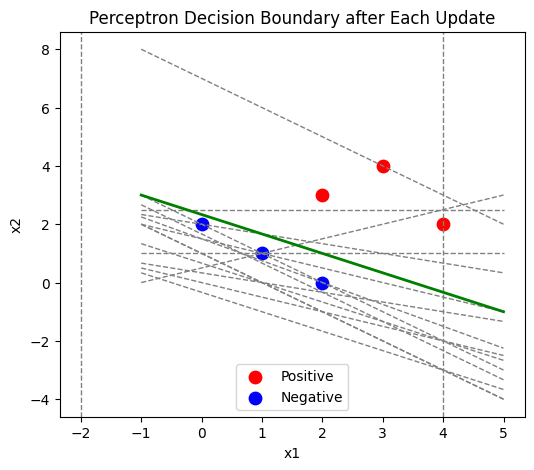

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

# 1.
# Positive examples (label=+1)
X_pos = np.array([[2, 3], [4, 2], [3, 4]])
# Negative examples (label=-1)
X_neg = np.array([[1, 1], [2, 0], [0, 2]])

X = np.vstack([X_pos, X_neg])
y = np.array([1]*len(X_pos) + [-1]*len(X_neg))

# 2.
w = np.zeros(2)
b = 0
history = []

def plot_boundary(ax, w, b, color='k', linewidth=2, linestyle='-'):
    if np.all(w == 0):
        return
    x_vals = np.linspace(-1, 5, 100)
    if w[1] != 0:
        y_vals = -(w[0] * x_vals + b) / w[1]
        ax.plot(x_vals, y_vals, color=color, linewidth=linewidth, linestyle=linestyle)
    else:
        x_val = -b / w[0]
        ax.axvline(x=x_val, color=color, linewidth=linewidth, linestyle=linestyle)

# 3.
max_iter = 20
for _ in range(max_iter):
    error = 0
    for i in range(len(X)):
        if y[i] * (np.dot(w, X[i]) + b) <= 0:
            w += y[i] * X[i]
            b += y[i]
            history.append((w.copy(), b))
            error += 1
    if error == 0:
        break

# 4.
fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(X_pos[:,0], X_pos[:,1], c='red', label='Positive', s=80)
ax.scatter(X_neg[:,0], X_neg[:,1], c='blue', label='Negative', s=80)
for i, (w_, b_) in enumerate(history):
    plot_boundary(ax, w_, b_, color='gray', linewidth=1, linestyle='--')
plot_boundary(ax, w, b, color='green', linewidth=2, linestyle='-')
ax.legend()
ax.set_title('Perceptron Decision Boundary after Each Update')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()
